<a href="https://colab.research.google.com/github/aditya0589/notebooks/blob/main/AI%20Engineering/Langchain/LC02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LC02 LANGCHAIN MODELS**

The model component in Langchain is a crutial part of the framework, designed to facilitate interactions with various language models and embedding models

It abstracts the complexity of working directly with different LLMs, chat models and embedding models, providing a uniform interface for communicating with them. This makes it easier to build applications that rely on AI generated text, text embeddings or similarity search, and Retrieval Augmented Generation (RAG)

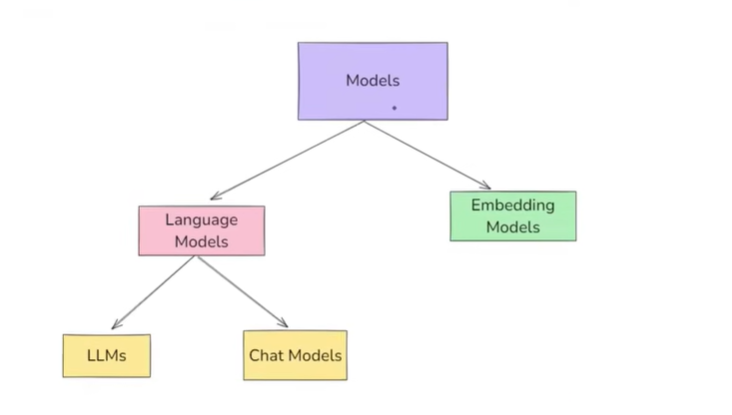

## **Language Models**

Language Models are the AI systems designed to process, generate and understand Natural Language text.

There are two types of Language Models:

1. **LLM**: General purpose models that are used for raw text generation.They take a string as input and return a string as output.

2. **Chat Models**: Language models that are specialized for conversational tasks. They take a sequence of messages as input and return chat messages as output.

| Feature | LLMs (Base Models) | Chat Models (Instruction-Tuned) |
|--------|-------------------|----------------------------------|
| **Purpose** | Free-form text generation | Optimized for multi-turn conversations |
| **Training Data** | General text corpora (books, articles) | Fine-tuned on chat datasets (dialogues, user–assistant conversations) |
| **Memory & Context** | No built-in memory | Supports structured conversation history |
| **Role Awareness** | No understanding of "user" and "assistant" roles | Understands "system", "user", and "assistant" roles |
| **Example Models** | GPT-3, LLaMA-2-7B, Mistral-7B, OPT-1.3B | GPT-4, GPT-3.5-turbo, LLaMA-2-Chat, Mistral-Instruct, Claude |
| **Use Cases** | Text generation, summarization, translation, creative writing, code generation | Conversational AI, chatbots, virtual assistants, customer support, AI tutors |

-------------------------------------------------------------------------

In [ ]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.1/489.1 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 1.2.1
    Uninstalling langchain-core-1.2.1:
      Successfully uninstalled langchain-core-1.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google

Please ensure you have a GROQ API KEY and it is stored in the notebook secrets, grant access to the notebook for accessing the key.

In [1]:
import os
from google.colab import userdata

# Load keys from Colab Secrets
os.environ["GROQ_API_KEY"] = userdata.get("GROQ_API_KEY")
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")
os.environ['HF_TOKEN'] = userdata.get('HF_TOKEN')
os.environ['HUGGINGFACEHUB_API_TOKEN'] = userdata.get('HUGGINGFACEHUB_API_TOKEN')

# Sanity check (safe partial print)
print("Groq:", os.environ["GROQ_API_KEY"][:8])
print("Google:", os.environ["GOOGLE_API_KEY"][:8])
print('HF_TOKEN', os.environ['HF_TOKEN'][:8])
print('huggingface api token', os.environ['HUGGINGFACEHUB_API_TOKEN'][:8])

Groq: gsk_L243
Google: AIzaSyCX
HF_TOKEN AIzaSyBE
huggingface api token hf_SMPRD


In [2]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv

load_dotenv()

# Initialize model
llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0.2
)

# Ask a question using invoke
response = llm.invoke("Explain overfitting in machine learning in simple terms.")

# Print only the text output
print(response.content)


ModuleNotFoundError: No module named 'langchain_groq'

In [ ]:
!pip install google_genai langchain_google_genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 713.3/713.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.9/234.9 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.43.0
    Uninstalling google-auth-2.43.0:
      Successfully uninstalled google-auth-2.43.0
  Attempting uninstall: google_genai
    Found existing installation: google-genai 1.55.0
    Uninstalling google-genai-1.55.0:
      Successfully uninstalled google-genai-1.55.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.43.0, but you have google-auth 2.47.0 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, bu

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv

load_dotenv()

llm = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash"
)

result = llm.invoke("What is no free lunch theorem in Machine Learning")

print(result.content)

The **No Free Lunch (NFL) theorem** is a fundamental concept in machine learning (and optimization in general) that states, in simple terms:

**No single algorithm is universally superior to all others across all possible problems.**

This means that if an algorithm performs exceptionally well on one class of problems, it must, on average, perform worse on another class of problems. There's no "free lunch" where you get excellent performance everywhere without making trade-offs or having specific knowledge about the problem at hand.

### Formal Statement (Wolpert & Macready, 1997)

More formally, for any two algorithms, their average performance across *all possible problems* is identical. This applies to supervised learning, unsupervised learning, reinforcement learning, and search algorithms.

### Key Implications for Machine Learning:

1.  **No Universally Best Algorithm:**
    *   There is no "silver bullet" or "master algorithm" (e.g., a specific neural network architecture, SVM, 

You find that we can interact with multiple different model providers (in this case, we interacted with both Groq and Google) with the same code. This is the power of langchain

## **Accessing Open-source models with Langchain Huggingface**

The Huggingface platform hosts a series of open-source models that we can interact with using their API.

We can also download and run open-source models locally via Ollama. But this is compute intensive and will not be covered in this notebook

In [3]:
!pip install langchain_huggingface

In [ ]:
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from dotenv import load_dotenv

load_dotenv()



In [7]:
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint

llm = HuggingFaceEndpoint(
    repo_id="google/gemma-2-9b-it",
    max_new_tokens=512,
    temperature=0.2,
)

chat_model = ChatHuggingFace(llm=llm)

response = chat_model.invoke("What is Apache Spark")

print(response.content)

Apache Spark is a powerful open-source **cluster computing framework** designed for **large-scale data processing**. 

Here's a breakdown:

**What it does:**

* **Distributes data and tasks:** Spark breaks down large datasets into smaller chunks and distributes them across a cluster of computers. It then divides the processing tasks accordingly, allowing for parallel execution and significantly faster processing.
* **Supports various programming languages:** You can write Spark applications in languages like Java, Scala, Python, and R, making it accessible to a wide range of developers.
* **Offers a range of functionalities:** Spark excels at various data processing tasks, including:
    * **Batch processing:** Analyzing large datasets stored in files.
    * **Stream processing:** Processing real-time data streams from sources like social media feeds or sensor networks.
    * **Machine learning:** Building and training machine learning models on massive datasets.
    * **Graph processi

In the above code snippet, we interact with the Gemma model, a powerful open-source large language model developed by Google via the Huggingface API in Langchain

We can also download and run these open-source models on our machine using the ``` HuggingFacePipeline``` class

## **EMBEDDING MODELS**

In [8]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

text = "This is a test sentence for embedding."
query_result = embeddings.embed_query(text)

print(f"Embedding length: {len(query_result)}")
print(f"First 10 elements of the embedding: {query_result[:10]}")

text2 = "This is another test sentence."
query_result2 = embeddings.embed_query(text2)
print(f"Embedding length of second sentence: {len(query_result2)}")
print(f"First 10 elements of the second embedding: {query_result2[:10]}")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embedding length: 384
First 10 elements of the embedding: [0.027824144810438156, 0.001702625653706491, 0.08005547523498535, 0.04666288569569588, 0.03852197900414467, 0.05190123990178108, 0.006919883191585541, -0.05277489498257637, 0.018782323226332664, -0.026010997593402863]
Embedding length of second sentence: 384
First 10 elements of the second embedding: [0.07382307946681976, 0.052485473453998566, -0.002734491601586342, 0.09297747910022736, 0.02392282336950302, -0.0053495122119784355, -0.004102116916328669, -0.03554171323776245, 0.04255981370806694, 0.027966024354100227]


This is how we use an embedding model using Langchain. There are other embedding models you can use.

Google AI Embeddings from `` langchain_google_genai.GoogleGenerativeAIEmbeddings``

OpenAI Embeddings:
`` langchain_openai.OpenAIEmbeddings``

etc